/home/ubuntu/kitti-3d-detection-unzipped/training/image_2/000481.png


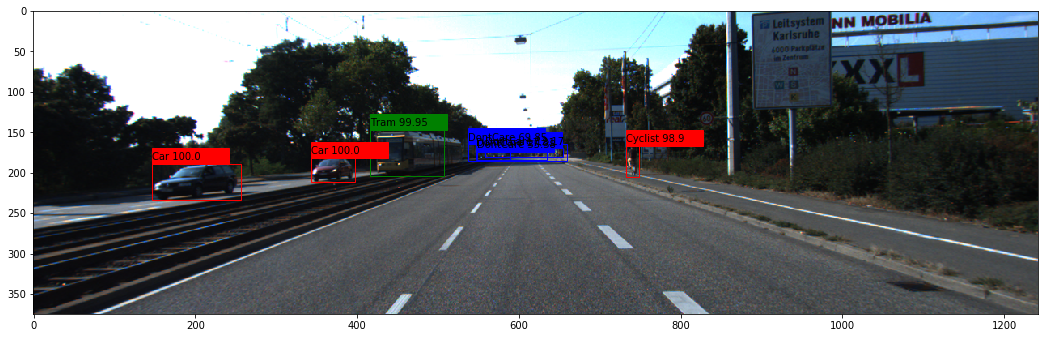

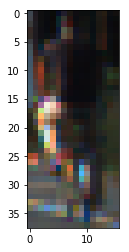

im a Cyclist and i am 98.90328645706177 percent sure


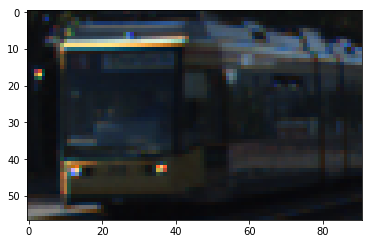

im a Tram and i am 99.94727969169617 percent sure


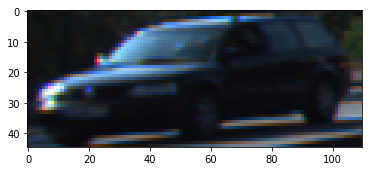

im a Car and i am 99.99755620956421 percent sure


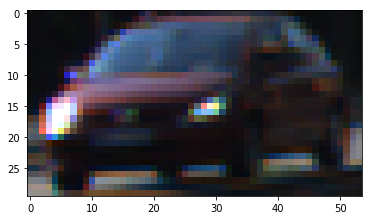

im a Car and i am 99.9984860420227 percent sure


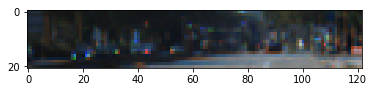

im a DontCare and i am 69.84807252883911 percent sure


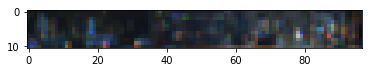

im a DontCare and i am 12.171581387519836 percent sure


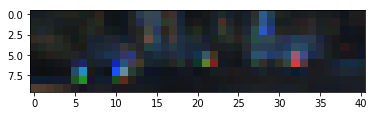

im a DontCare and i am 35.37722826004028 percent sure


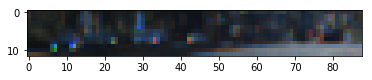

im a DontCare and i am 17.814813554286957 percent sure


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import os
#please input number between 351-700
numimage=440
categories = ['Cyclist','Tram','Person_sitting','Truck','Pedestrian','Van','Car','Misc','DontCare']
colors =['r','g','r','b','r','b','b','c','m']
colors = ['r','g','b','c','m','y','r','g','b']
def getImageStr(id):
    str1="/home/ubuntu/kitti-3d-detection-unzipped/training/image_2/"+str(id).zfill(6)+".png"
    print(str1)
    return str1
def getInfo(imid):
    with open('checkpoints2/mypikl.pkl.bbox.json') as file:
        data=json.load(file)
        for dctn in data:
            if (dctn['image_id']==imid):
                for i in range(4):
                    dctn['bbox'][i]=int(dctn['bbox'][i])
                yield (dctn['bbox'],dctn['category_id'],dctn['score'])
                    
    
#id to read?
img = cv2.imread(getImageStr(numimage))
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, aspect='equal')

for imin in getInfo(numimage):
    box=imin[0]
    
    # Create a Rectangle patch
    rect = patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=1,edgecolor=colors[imin[1]-1],facecolor='none')
    rect_text = patches.Rectangle((box[0],box[1]-20),95,20,linewidth=1,edgecolor=colors[imin[1]-1],facecolor=colors[imin[1]-1])

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.add_patch(rect_text)
    ax.text(box[0],box[1]-5,categories[imin[1]-1] + " " + str(round(imin[2]*100,2)))

plt.imshow(img)
plt.show()

for imin in getInfo(numimage):
    box=imin[0]
    
    # Create a Rectangle patch
    rect = patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    
    plt.imshow(img[box[1]:box[1]+box[3],box[0]:box[0]+box[2]])
    plt.show()
    print("im a "+categories[imin[1]-1]+" and i am "+str(imin[2]*100)+" percent sure")
    


In [54]:
import pickle
with open('./checkpoints2/kistre.pkl', 'rb') as f:
    data = pickle.load(f)


In [57]:
print(data[0][0][6].shape)

(9, 5)


In [ ]:
def read_pkl(image_index,)